In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = fetch_california_housing(as_frame=True)
df = data.frame

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


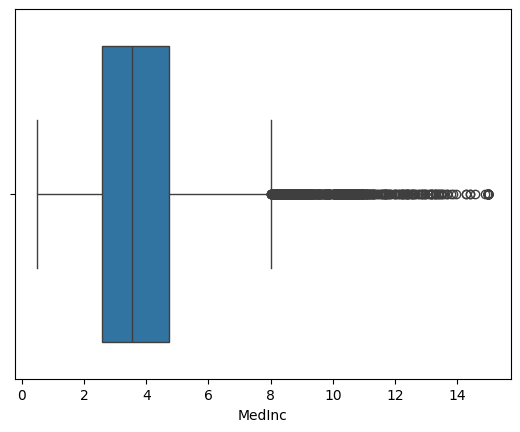

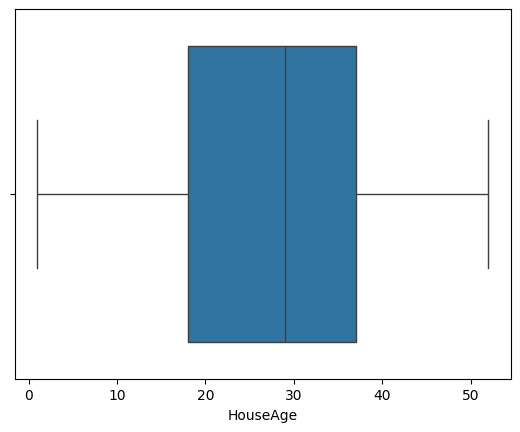

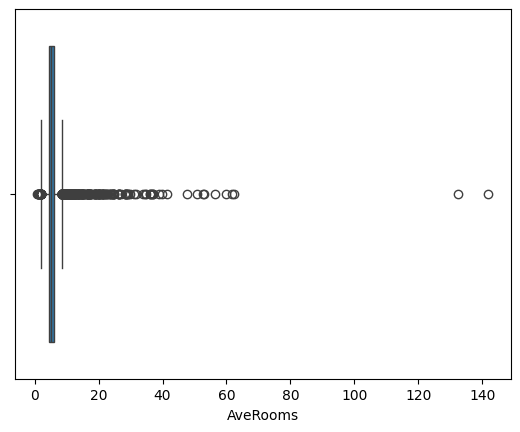

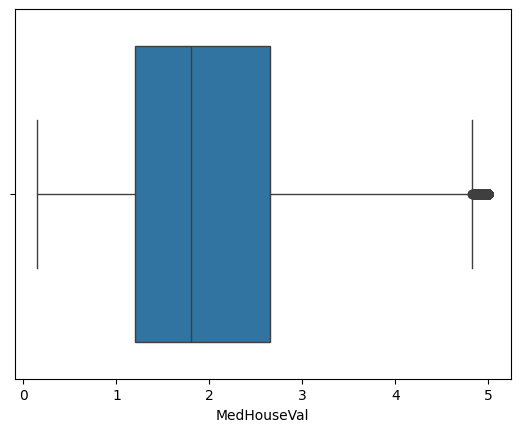

In [3]:
sns.boxplot(x=df['MedInc'])
plt.show()

sns.boxplot(x=df['HouseAge'])
plt.show()

sns.boxplot(x=df['AveRooms'])
plt.show()

sns.boxplot(x=df['MedHouseVal'])
plt.show()

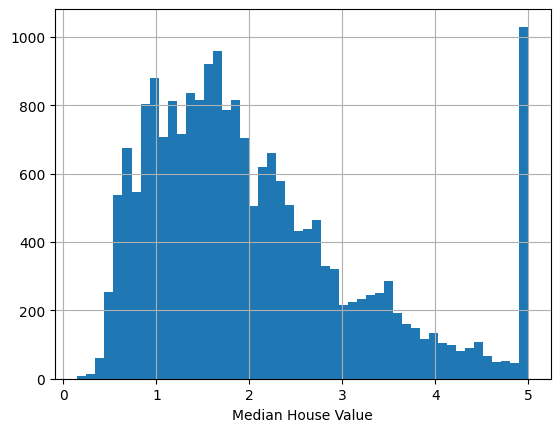

In [4]:
df['MedHouseVal'].hist(bins=50)
plt.xlabel('Median House Value')
plt.show()

In [7]:
import numpy as np
from scipy import stats

z_scores = np.abs(stats.zscore(df['MedHouseVal']))
outliers_z = df[z_scores > 3]
print(outliers_z.shape)

(0, 9)


In [8]:
Q1 = df['MedHouseVal'].quantile(0.25)
Q3 = df['MedHouseVal'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['MedHouseVal'] < lower_bound) | (df['MedHouseVal'] > upper_bound)]
print(outliers_iqr.shape)

(1071, 9)


In [10]:
df_removed = df[(df['MedHouseVal'] >= lower_bound) & (df['MedHouseVal'] <= upper_bound)]
print(df_removed.shape)

(19569, 9)


In [11]:
outliers_iqr1 = df_removed[(df_removed['MedHouseVal'] < lower_bound) | (df_removed['MedHouseVal'] > upper_bound)]
print(outliers_iqr1.shape)

(0, 9)


In [12]:
df_capped = df.copy()
df_capped['MedHouseVal'] = np.where(df_capped['MedHouseVal'] > upper_bound, upper_bound,
                                    np.where(df_capped['MedHouseVal'] < lower_bound, lower_bound, df_capped['MedHouseVal']))

In [13]:
outliers_iqr2 = df_capped[(df_capped['MedHouseVal'] < lower_bound) | (df_capped['MedHouseVal'] > upper_bound)]
print(outliers_iqr2.shape)

(0, 9)


In [14]:
df_log = df.copy()
df_log['MedHouseVal'] = np.log(df_log['MedHouseVal'] + 1)  # adding 1 to avoid log(0)

In [15]:
outliers_iqr3 = df_log[(df_capped['MedHouseVal'] < lower_bound) | (df_log['MedHouseVal'] > upper_bound)]
print(outliers_iqr3.shape)

(0, 9)


In [16]:
df_imp = df.copy()
median_value = df['MedHouseVal'].median()
df_imp.loc[(df_imp['MedHouseVal'] > upper_bound) | (df_imp['MedHouseVal'] < lower_bound), 'MedHouseVal'] = median_value

In [17]:
outliers_iqr4 = df_imp[(df_capped['MedHouseVal'] < lower_bound) | (df_imp['MedHouseVal'] > upper_bound)]
print(outliers_iqr4.shape)

(0, 9)
